In [38]:
from collections import defaultdict
import numpy as np
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

import pyLDAvis
# gensim
from gensim import corpora, models, similarities, matutils
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
# logging for gensim (set to INFO)
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

from mongo_client import mongo_client

In [2]:
db = mongo_client.get_database('historical_events')
collection = db.get_collection('event_descriptions')

In [3]:
stop_words = list(ENGLISH_STOP_WORDS) + [
    'abc', 'ampndash', 'ampamp', 'amp', 'ampampndash', 'ampquot', 'ampquotthe', 'ampref',
    'http',
]
count_vectorizer = CountVectorizer(ngram_range=(1,1), min_df=0.001, max_df=0.7,
                                   stop_words=stop_words, token_pattern="\\b[a-z][a-z]+\\b")
docs = [doc['description'].split('{{')[0] for doc in collection.find()]
count_vectorizer.fit(docs)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.7, max_features=None, min_df=0.001,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=['almost', 'off', 'therein', 'after', 'now', 'a', 'he', 'those', 'became', 'whose', 'same', 'so', 'often', 'meanwhile', 'someone', 'along', 'because', 'can', 'have', 'namely', 'sometimes', 'latterly', 'might', 'among', 'moreover', 'themselves', 'each', 'becomes', 'none', 'until', 'could',...yway', 'abc', 'ampndash', 'ampamp', 'amp', 'ampampndash', 'ampquot', 'ampquotthe', 'ampref', 'http'],
        strip_accents=None, token_pattern='\\b[a-z][a-z]+\\b',
        tokenizer=None, vocabulary=None)

In [4]:
count_vectorizer.get_feature_names()

['abdicates',
 'abdul',
 'aboard',
 'abolished',
 'abolishes',
 'abraham',
 'academy',
 'accepts',
 'accident',
 'according',
 'accused',
 'acquitted',
 'act',
 'acting',
 'action',
 'activist',
 'actor',
 'address',
 'administration',
 'admiral',
 'admits',
 'admitted',
 'adolf',
 'adopted',
 'adopts',
 'advance',
 'affair',
 'afghanistan',
 'africa',
 'african',
 'age',
 'agency',
 'agents',
 'agree',
 'agreement',
 'agrees',
 'aid',
 'air',
 'aircraft',
 'airliner',
 'airlines',
 'airplane',
 'airport',
 'airways',
 'al',
 'alabama',
 'alaska',
 'albania',
 'albert',
 'album',
 'alexander',
 'alfred',
 'algeria',
 'ali',
 'alleged',
 'alliance',
 'allied',
 'allies',
 'allowing',
 'alpha',
 'alps',
 'ambassador',
 'amendment',
 'america',
 'american',
 'americans',
 'amsterdam',
 'andrew',
 'angeles',
 'anglo',
 'animated',
 'annexes',
 'anniversary',
 'announce',
 'announced',
 'announces',
 'annual',
 'anti',
 'antonio',
 'apartheid',
 'apollo',
 'appearance',
 'appears',
 'appoin

In [5]:
counts = count_vectorizer.transform(docs).transpose()
counts.shape

(1748, 20037)

In [6]:
corpus = matutils.Sparse2Corpus(counts)

In [7]:
id2word = {id: word for word, id in count_vectorizer.vocabulary_.items()}

In [29]:
num_topics = 10
lda = models.LdaModel(corpus=corpus, num_topics=num_topics, minimum_probability=0.01, id2word=id2word, passes=10)

2018-05-30 19:17:01,368 : INFO : using symmetric alpha at 0.1
2018-05-30 19:17:01,375 : INFO : using symmetric eta at 0.1
2018-05-30 19:17:01,380 : INFO : using serial LDA version on this node
2018-05-30 19:17:01,405 : INFO : running online (multi-pass) LDA training, 10 topics, 10 passes over the supplied corpus of 20037 documents, updating model once every 2000 documents, evaluating perplexity every 20000 documents, iterating 50x with a convergence threshold of 0.001000
2018-05-30 19:17:01,450 : INFO : PROGRESS: pass 0, at document #2000/20037
2018-05-30 19:17:02,029 : INFO : merging changes from 2000 documents into a model of 20037 documents
2018-05-30 19:17:02,032 : INFO : topic #3 (0.100): 0.039*"war" + 0.017*"british" + 0.016*"world" + 0.014*"republic" + 0.014*"germany" + 0.012*"army" + 0.011*"empire" + 0.011*"declares" + 0.010*"independence" + 0.009*"second"
2018-05-30 19:17:02,033 : INFO : topic #1 (0.100): 0.017*"league" + 0.015*"founded" + 0.013*"national" + 0.012*"russia" + 0

2018-05-30 19:17:04,472 : INFO : topic #4 (0.100): 0.022*"minister" + 0.021*"prime" + 0.019*"party" + 0.019*"television" + 0.017*"united" + 0.015*"win" + 0.014*"cup" + 0.013*"israel" + 0.013*"launched" + 0.011*"kingdom"
2018-05-30 19:17:04,472 : INFO : topic diff=0.219160, rho=0.408248
2018-05-30 19:17:04,480 : INFO : PROGRESS: pass 0, at document #14000/20037
2018-05-30 19:17:04,969 : INFO : merging changes from 2000 documents into a model of 20037 documents
2018-05-30 19:17:04,973 : INFO : topic #3 (0.100): 0.040*"republic" + 0.037*"war" + 0.020*"independence" + 0.015*"democratic" + 0.014*"declares" + 0.014*"civil" + 0.014*"china" + 0.012*"ireland" + 0.012*"northern" + 0.011*"government"
2018-05-30 19:17:04,974 : INFO : topic #2 (0.100): 0.066*"united" + 0.053*"states" + 0.017*"president" + 0.013*"world" + 0.012*"european" + 0.012*"nations" + 0.012*"series" + 0.011*"american" + 0.011*"cold" + 0.010*"disarmament"
2018-05-30 19:17:04,975 : INFO : topic #1 (0.100): 0.024*"national" + 0.

2018-05-30 19:17:07,049 : INFO : topic #6 (0.100): 0.034*"north" + 0.030*"mile" + 0.027*"carolina" + 0.027*"french" + 0.020*"town" + 0.019*"troops" + 0.014*"day" + 0.014*"army" + 0.013*"foreign" + 0.013*"government"
2018-05-30 19:17:07,050 : INFO : topic diff=0.187940, rho=0.288453
2018-05-30 19:17:07,061 : INFO : PROGRESS: pass 1, at document #4000/20037
2018-05-30 19:17:07,401 : INFO : merging changes from 2000 documents into a model of 20037 documents
2018-05-30 19:17:07,404 : INFO : topic #2 (0.100): 0.077*"united" + 0.073*"states" + 0.020*"american" + 0.018*"world" + 0.016*"place" + 0.015*"company" + 0.014*"takes" + 0.013*"college" + 0.012*"founded" + 0.012*"conference"
2018-05-30 19:17:07,405 : INFO : topic #8 (0.100): 0.052*"founded" + 0.029*"german" + 0.023*"university" + 0.022*"state" + 0.022*"free" + 0.022*"john" + 0.021*"school" + 0.019*"hitler" + 0.013*"germany" + 0.010*"assassination"
2018-05-30 19:17:07,406 : INFO : topic #6 (0.100): 0.032*"french" + 0.028*"north" + 0.021

2018-05-30 19:17:09,140 : INFO : topic diff=0.166000, rho=0.288453
2018-05-30 19:17:09,148 : INFO : PROGRESS: pass 1, at document #16000/20037
2018-05-30 19:17:09,444 : INFO : merging changes from 2000 documents into a model of 20037 documents
2018-05-30 19:17:09,448 : INFO : topic #2 (0.100): 0.100*"united" + 0.077*"states" + 0.020*"president" + 0.017*"european" + 0.016*"world" + 0.015*"nations" + 0.014*"news" + 0.013*"takes" + 0.012*"series" + 0.011*"american"
2018-05-30 19:17:09,449 : INFO : topic #4 (0.100): 0.047*"minister" + 0.045*"prime" + 0.032*"president" + 0.029*"party" + 0.025*"election" + 0.018*"elected" + 0.017*"presidential" + 0.017*"israel" + 0.014*"defeats" + 0.013*"win"
2018-05-30 19:17:09,450 : INFO : topic #9 (0.100): 0.017*"battle" + 0.014*"australia" + 0.013*"killing" + 0.013*"american" + 0.013*"coast" + 0.012*"suicide" + 0.011*"dead" + 0.011*"near" + 0.011*"injured" + 0.011*"weapons"
2018-05-30 19:17:09,451 : INFO : topic #1 (0.100): 0.020*"national" + 0.019*"coun

2018-05-30 19:17:11,227 : INFO : topic diff=0.141974, rho=0.277153
2018-05-30 19:17:11,371 : INFO : PROGRESS: pass 2, at document #6000/20037
2018-05-30 19:17:11,642 : INFO : merging changes from 2000 documents into a model of 20037 documents
2018-05-30 19:17:11,645 : INFO : topic #8 (0.100): 0.063*"founded" + 0.025*"school" + 0.024*"state" + 0.023*"university" + 0.019*"john" + 0.019*"free" + 0.017*"hitler" + 0.015*"germany" + 0.015*"german" + 0.011*"berlin"
2018-05-30 19:17:11,646 : INFO : topic #2 (0.100): 0.108*"united" + 0.088*"states" + 0.017*"takes" + 0.017*"president" + 0.016*"american" + 0.014*"world" + 0.014*"place" + 0.014*"act" + 0.014*"conference" + 0.013*"radio"
2018-05-30 19:17:11,649 : INFO : topic #3 (0.100): 0.070*"war" + 0.030*"battle" + 0.025*"union" + 0.024*"british" + 0.021*"soviet" + 0.021*"forces" + 0.020*"republic" + 0.020*"troops" + 0.018*"wwii" + 0.015*"civil"
2018-05-30 19:17:11,650 : INFO : topic #4 (0.100): 0.040*"minister" + 0.032*"prime" + 0.024*"presiden

2018-05-30 19:17:13,540 : INFO : merging changes from 2000 documents into a model of 20037 documents
2018-05-30 19:17:13,543 : INFO : topic #8 (0.100): 0.047*"founded" + 0.030*"university" + 0.027*"john" + 0.021*"state" + 0.017*"college" + 0.015*"school" + 0.013*"president" + 0.011*"free" + 0.011*"pope" + 0.010*"kill"
2018-05-30 19:17:13,545 : INFO : topic #4 (0.100): 0.045*"minister" + 0.041*"president" + 0.041*"prime" + 0.029*"party" + 0.025*"election" + 0.021*"elected" + 0.018*"presidential" + 0.017*"defeats" + 0.013*"israel" + 0.013*"england"
2018-05-30 19:17:13,547 : INFO : topic #1 (0.100): 0.026*"king" + 0.024*"world" + 0.024*"opens" + 0.019*"ii" + 0.018*"national" + 0.017*"established" + 0.016*"london" + 0.015*"council" + 0.013*"international" + 0.012*"assembly"
2018-05-30 19:17:13,549 : INFO : topic #0 (0.100): 0.058*"people" + 0.034*"killing" + 0.034*"kills" + 0.024*"killed" + 0.018*"earthquake" + 0.017*"west" + 0.017*"iraq" + 0.014*"bomb" + 0.014*"spain" + 0.012*"ref"
2018-0

2018-05-30 19:17:15,224 : INFO : topic diff=0.077044, rho=0.267085
2018-05-30 19:17:15,236 : INFO : PROGRESS: pass 3, at document #8000/20037
2018-05-30 19:17:15,499 : INFO : merging changes from 2000 documents into a model of 20037 documents
2018-05-30 19:17:15,503 : INFO : topic #3 (0.100): 0.064*"war" + 0.032*"soviet" + 0.032*"union" + 0.028*"battle" + 0.026*"republic" + 0.023*"british" + 0.019*"troops" + 0.018*"forces" + 0.017*"civil" + 0.015*"wwii"
2018-05-30 19:17:15,503 : INFO : topic #6 (0.100): 0.036*"french" + 0.028*"north" + 0.024*"vietnam" + 0.024*"army" + 0.016*"troops" + 0.016*"south" + 0.016*"france" + 0.014*"nuclear" + 0.013*"day" + 0.013*"foreign"
2018-05-30 19:17:15,504 : INFO : topic #4 (0.100): 0.045*"minister" + 0.035*"prime" + 0.030*"president" + 0.024*"party" + 0.017*"communist" + 0.016*"elected" + 0.016*"television" + 0.014*"house" + 0.014*"football" + 0.013*"club"
2018-05-30 19:17:15,504 : INFO : topic #7 (0.100): 0.105*"new" + 0.050*"york" + 0.049*"city" + 0.0

2018-05-30 19:17:17,436 : INFO : PROGRESS: pass 3, at document #20000/20037
2018-05-30 19:17:17,670 : INFO : merging changes from 2000 documents into a model of 20037 documents
2018-05-30 19:17:17,673 : INFO : topic #1 (0.100): 0.030*"world" + 0.029*"opens" + 0.027*"king" + 0.025*"established" + 0.019*"london" + 0.019*"ii" + 0.017*"national" + 0.014*"international" + 0.014*"queen" + 0.012*"council"
2018-05-30 19:17:17,674 : INFO : topic #0 (0.100): 0.055*"people" + 0.031*"kills" + 0.031*"killing" + 0.024*"killed" + 0.019*"west" + 0.017*"earthquake" + 0.017*"spain" + 0.014*"iraq" + 0.013*"occurs" + 0.013*"bomb"
2018-05-30 19:17:17,675 : INFO : topic #7 (0.100): 0.098*"new" + 0.049*"city" + 0.042*"york" + 0.017*"court" + 0.015*"america" + 0.014*"space" + 0.012*"san" + 0.012*"high" + 0.012*"government" + 0.011*"dies"
2018-05-30 19:17:17,676 : INFO : topic #4 (0.100): 0.040*"minister" + 0.040*"president" + 0.035*"prime" + 0.027*"party" + 0.024*"election" + 0.020*"football" + 0.018*"club" +

2018-05-30 19:17:19,302 : INFO : merging changes from 2000 documents into a model of 20037 documents
2018-05-30 19:17:19,306 : INFO : topic #1 (0.100): 0.037*"world" + 0.029*"king" + 0.029*"opens" + 0.022*"established" + 0.019*"national" + 0.018*"council" + 0.018*"international" + 0.016*"ii" + 0.016*"league" + 0.014*"london"
2018-05-30 19:17:19,307 : INFO : topic #6 (0.100): 0.042*"vietnam" + 0.028*"french" + 0.028*"north" + 0.023*"army" + 0.018*"south" + 0.017*"war" + 0.015*"richard" + 0.015*"france" + 0.014*"troops" + 0.014*"begins"
2018-05-30 19:17:19,308 : INFO : topic #7 (0.100): 0.100*"new" + 0.047*"york" + 0.047*"city" + 0.019*"strike" + 0.016*"court" + 0.016*"government" + 0.014*"moon" + 0.013*"america" + 0.013*"high" + 0.013*"opens"
2018-05-30 19:17:19,310 : INFO : topic #8 (0.100): 0.059*"founded" + 0.025*"university" + 0.021*"program" + 0.021*"john" + 0.020*"school" + 0.020*"state" + 0.015*"free" + 0.015*"coup" + 0.015*"military" + 0.011*"college"
2018-05-30 19:17:19,311 : I

2018-05-30 19:17:21,210 : INFO : PROGRESS: pass 4, at document #20037/20037
2018-05-30 19:17:21,222 : INFO : merging changes from 37 documents into a model of 20037 documents
2018-05-30 19:17:21,227 : INFO : topic #9 (0.100): 0.027*"grand" + 0.027*"line" + 0.023*"island" + 0.021*"near" + 0.021*"american" + 0.017*"ocean" + 0.016*"long" + 0.014*"hospital" + 0.014*"make" + 0.014*"collapses"
2018-05-30 19:17:21,228 : INFO : topic #0 (0.100): 0.047*"people" + 0.032*"destroyed" + 0.030*"killed" + 0.027*"kills" + 0.026*"killing" + 0.020*"mount" + 0.019*"david" + 0.019*"mission" + 0.019*"book" + 0.017*"japan"
2018-05-30 19:17:21,229 : INFO : topic #8 (0.100): 0.130*"founded" + 0.052*"school" + 0.032*"college" + 0.032*"free" + 0.031*"university" + 0.027*"john" + 0.020*"state" + 0.016*"mars" + 0.016*"assassination" + 0.015*"chicago"
2018-05-30 19:17:21,229 : INFO : topic #1 (0.100): 0.051*"world" + 0.034*"established" + 0.034*"king" + 0.024*"international" + 0.023*"opens" + 0.023*"council" + 0.0

2018-05-30 19:17:22,981 : INFO : topic #1 (0.100): 0.042*"world" + 0.027*"opens" + 0.024*"king" + 0.021*"national" + 0.020*"established" + 0.019*"ii" + 0.018*"council" + 0.017*"international" + 0.016*"released" + 0.014*"london"
2018-05-30 19:17:22,981 : INFO : topic #5 (0.100): 0.025*"year" + 0.019*"general" + 0.019*"www" + 0.016*"wins" + 0.016*"href" + 0.015*"held" + 0.014*"uk" + 0.013*"com" + 0.013*"charles" + 0.012*"led"
2018-05-30 19:17:22,982 : INFO : topic #0 (0.100): 0.059*"people" + 0.034*"kills" + 0.030*"killing" + 0.027*"killed" + 0.019*"west" + 0.016*"operation" + 0.016*"bomb" + 0.015*"earthquake" + 0.013*"iran" + 0.013*"spain"
2018-05-30 19:17:22,984 : INFO : topic #9 (0.100): 0.027*"flight" + 0.023*"air" + 0.021*"wwii" + 0.019*"killing" + 0.018*"crashes" + 0.018*"near" + 0.014*"american" + 0.013*"australia" + 0.012*"british" + 0.012*"island"
2018-05-30 19:17:22,985 : INFO : topic diff=0.067728, rho=0.249856
2018-05-30 19:17:22,992 : INFO : PROGRESS: pass 5, at document #14

2018-05-30 19:17:24,893 : INFO : topic #6 (0.100): 0.040*"north" + 0.036*"french" + 0.027*"mile" + 0.025*"carolina" + 0.024*"town" + 0.020*"army" + 0.017*"paris" + 0.015*"france" + 0.015*"foreign" + 0.014*"day"
2018-05-30 19:17:24,894 : INFO : topic #7 (0.100): 0.106*"new" + 0.056*"city" + 0.053*"york" + 0.037*"strike" + 0.024*"high" + 0.020*"moon" + 0.020*"court" + 0.020*"america" + 0.019*"alaska" + 0.016*"opens"
2018-05-30 19:17:24,895 : INFO : topic #4 (0.100): 0.039*"president" + 0.035*"minister" + 0.030*"prime" + 0.028*"football" + 0.027*"party" + 0.026*"club" + 0.020*"election" + 0.017*"japan" + 0.017*"right" + 0.017*"elected"
2018-05-30 19:17:24,897 : INFO : topic #8 (0.100): 0.124*"founded" + 0.043*"school" + 0.032*"university" + 0.028*"free" + 0.027*"college" + 0.023*"john" + 0.022*"state" + 0.014*"chicago" + 0.013*"assassination" + 0.012*"alpha"
2018-05-30 19:17:24,898 : INFO : topic diff=0.056857, rho=0.242404
2018-05-30 19:17:24,910 : INFO : PROGRESS: pass 6, at document #4

2018-05-30 19:17:26,702 : INFO : topic #5 (0.100): 0.026*"year" + 0.020*"www" + 0.019*"wins" + 0.018*"general" + 0.017*"held" + 0.015*"href" + 0.014*"uk" + 0.013*"com" + 0.013*"led" + 0.012*"old"
2018-05-30 19:17:26,703 : INFO : topic #8 (0.100): 0.040*"founded" + 0.020*"john" + 0.020*"university" + 0.019*"coup" + 0.019*"military" + 0.019*"state" + 0.017*"program" + 0.016*"school" + 0.015*"free" + 0.014*"paul"
2018-05-30 19:17:26,704 : INFO : topic #9 (0.100): 0.031*"flight" + 0.025*"air" + 0.023*"killing" + 0.022*"crashes" + 0.018*"near" + 0.016*"wwii" + 0.013*"board" + 0.013*"dead" + 0.013*"american" + 0.012*"force"
2018-05-30 19:17:26,706 : INFO : topic diff=0.055525, rho=0.242404
2018-05-30 19:17:26,719 : INFO : PROGRESS: pass 6, at document #16000/20037
2018-05-30 19:17:27,005 : INFO : merging changes from 2000 documents into a model of 20037 documents
2018-05-30 19:17:27,008 : INFO : topic #1 (0.100): 0.047*"world" + 0.023*"opens" + 0.022*"king" + 0.022*"national" + 0.019*"counci

2018-05-30 19:17:28,659 : INFO : topic #2 (0.100): 0.111*"united" + 0.084*"states" + 0.027*"kingdom" + 0.020*"act" + 0.019*"takes" + 0.018*"place" + 0.015*"company" + 0.015*"radio" + 0.015*"president" + 0.015*"american"
2018-05-30 19:17:28,659 : INFO : topic #6 (0.100): 0.039*"french" + 0.034*"north" + 0.020*"army" + 0.020*"mile" + 0.020*"france" + 0.019*"town" + 0.018*"carolina" + 0.017*"foreign" + 0.016*"german" + 0.015*"paris"
2018-05-30 19:17:28,661 : INFO : topic #8 (0.100): 0.100*"founded" + 0.036*"school" + 0.027*"university" + 0.024*"free" + 0.021*"college" + 0.020*"state" + 0.020*"john" + 0.017*"hitler" + 0.013*"chicago" + 0.011*"assassination"
2018-05-30 19:17:28,662 : INFO : topic diff=0.057689, rho=0.235581
2018-05-30 19:17:28,674 : INFO : PROGRESS: pass 7, at document #6000/20037
2018-05-30 19:17:28,939 : INFO : merging changes from 2000 documents into a model of 20037 documents
2018-05-30 19:17:28,942 : INFO : topic #6 (0.100): 0.038*"french" + 0.032*"north" + 0.028*"army

2018-05-30 19:17:30,586 : INFO : topic #7 (0.100): 0.090*"new" + 0.042*"city" + 0.035*"york" + 0.024*"space" + 0.020*"court" + 0.015*"government" + 0.013*"strike" + 0.013*"airport" + 0.012*"dies" + 0.012*"launched"
2018-05-30 19:17:30,587 : INFO : topic #2 (0.100): 0.116*"united" + 0.078*"states" + 0.024*"president" + 0.023*"kingdom" + 0.019*"nations" + 0.016*"takes" + 0.016*"european" + 0.014*"act" + 0.012*"african" + 0.012*"place"
2018-05-30 19:17:30,587 : INFO : topic diff=0.048260, rho=0.235581
2018-05-30 19:17:30,600 : INFO : PROGRESS: pass 7, at document #18000/20037
2018-05-30 19:17:30,883 : INFO : merging changes from 2000 documents into a model of 20037 documents
2018-05-30 19:17:30,887 : INFO : topic #3 (0.100): 0.071*"war" + 0.034*"battle" + 0.033*"union" + 0.029*"civil" + 0.026*"republic" + 0.022*"soviet" + 0.022*"american" + 0.020*"forces" + 0.018*"independence" + 0.017*"british"
2018-05-30 19:17:30,887 : INFO : topic #6 (0.100): 0.034*"french" + 0.029*"north" + 0.021*"arm

2018-05-30 19:17:32,473 : INFO : topic #8 (0.100): 0.093*"founded" + 0.030*"school" + 0.025*"university" + 0.021*"free" + 0.019*"state" + 0.018*"college" + 0.017*"john" + 0.016*"hitler" + 0.012*"military" + 0.011*"berlin"
2018-05-30 19:17:32,474 : INFO : topic #0 (0.100): 0.053*"people" + 0.035*"kills" + 0.027*"killing" + 0.023*"killed" + 0.020*"destroyed" + 0.019*"operation" + 0.017*"earthquake" + 0.016*"japan" + 0.016*"bomb" + 0.015*"mount"
2018-05-30 19:17:32,475 : INFO : topic diff=0.040705, rho=0.229304
2018-05-30 19:17:32,487 : INFO : PROGRESS: pass 8, at document #8000/20037
2018-05-30 19:17:32,757 : INFO : merging changes from 2000 documents into a model of 20037 documents
2018-05-30 19:17:32,760 : INFO : topic #5 (0.100): 0.025*"year" + 0.020*"general" + 0.018*"www" + 0.016*"charles" + 0.014*"href" + 0.013*"wins" + 0.013*"held" + 0.013*"film" + 0.013*"com" + 0.012*"history"
2018-05-30 19:17:32,762 : INFO : topic #4 (0.100): 0.044*"minister" + 0.043*"president" + 0.035*"prime" 

2018-05-30 19:17:34,294 : INFO : topic #7 (0.100): 0.098*"new" + 0.048*"city" + 0.039*"york" + 0.019*"space" + 0.018*"court" + 0.015*"america" + 0.013*"government" + 0.012*"san" + 0.012*"dies" + 0.011*"strike"
2018-05-30 19:17:34,296 : INFO : topic diff=0.069377, rho=0.229304
2018-05-30 19:17:34,774 : INFO : -7.175 per-word bound, 144.5 perplexity estimate based on a held-out corpus of 2000 documents with 12324 words
2018-05-30 19:17:34,775 : INFO : PROGRESS: pass 8, at document #20000/20037
2018-05-30 19:17:35,023 : INFO : merging changes from 2000 documents into a model of 20037 documents
2018-05-30 19:17:35,026 : INFO : topic #3 (0.100): 0.073*"war" + 0.037*"battle" + 0.031*"union" + 0.028*"civil" + 0.023*"republic" + 0.023*"american" + 0.020*"forces" + 0.018*"british" + 0.018*"soviet" + 0.018*"general"
2018-05-30 19:17:35,028 : INFO : topic #8 (0.100): 0.078*"founded" + 0.039*"university" + 0.026*"college" + 0.022*"school" + 0.020*"john" + 0.019*"state" + 0.014*"military" + 0.011*"

2018-05-30 19:17:36,213 : INFO : topic #1 (0.100): 0.051*"world" + 0.032*"king" + 0.030*"opens" + 0.028*"established" + 0.019*"international" + 0.019*"council" + 0.017*"national" + 0.016*"ii" + 0.014*"london" + 0.014*"league"
2018-05-30 19:17:36,214 : INFO : topic diff=0.059003, rho=0.223503
2018-05-30 19:17:36,226 : INFO : PROGRESS: pass 9, at document #10000/20037
2018-05-30 19:17:36,493 : INFO : merging changes from 2000 documents into a model of 20037 documents
2018-05-30 19:17:36,496 : INFO : topic #1 (0.100): 0.050*"world" + 0.029*"king" + 0.028*"opens" + 0.025*"established" + 0.020*"national" + 0.018*"council" + 0.017*"international" + 0.016*"ii" + 0.015*"league" + 0.014*"london"
2018-05-30 19:17:36,496 : INFO : topic #6 (0.100): 0.039*"vietnam" + 0.029*"north" + 0.029*"french" + 0.024*"army" + 0.019*"south" + 0.018*"war" + 0.016*"france" + 0.016*"begins" + 0.014*"richard" + 0.014*"troops"
2018-05-30 19:17:36,497 : INFO : topic #4 (0.100): 0.044*"president" + 0.041*"minister" + 

2018-05-30 19:17:38,379 : INFO : topic diff=0.052188, rho=0.223503
2018-05-30 19:17:38,400 : INFO : -6.629 per-word bound, 99.0 perplexity estimate based on a held-out corpus of 37 documents with 195 words
2018-05-30 19:17:38,402 : INFO : PROGRESS: pass 9, at document #20037/20037
2018-05-30 19:17:38,419 : INFO : merging changes from 37 documents into a model of 20037 documents
2018-05-30 19:17:38,424 : INFO : topic #4 (0.100): 0.047*"president" + 0.037*"minister" + 0.032*"prime" + 0.028*"football" + 0.026*"club" + 0.024*"party" + 0.021*"election" + 0.018*"right" + 0.017*"japan" + 0.017*"introduced"
2018-05-30 19:17:38,425 : INFO : topic #3 (0.100): 0.079*"war" + 0.046*"battle" + 0.030*"union" + 0.026*"american" + 0.021*"civil" + 0.020*"british" + 0.019*"troops" + 0.019*"general" + 0.018*"second" + 0.018*"republic"
2018-05-30 19:17:38,434 : INFO : topic #0 (0.100): 0.050*"people" + 0.028*"destroyed" + 0.028*"kills" + 0.027*"killed" + 0.026*"killing" + 0.018*"mount" + 0.017*"mission" + 

In [30]:
lda.print_topics()

2018-05-30 19:17:54,267 : INFO : topic #0 (0.100): 0.050*"people" + 0.028*"destroyed" + 0.028*"kills" + 0.027*"killed" + 0.026*"killing" + 0.018*"mount" + 0.017*"mission" + 0.017*"david" + 0.017*"book" + 0.016*"japan"
2018-05-30 19:17:54,281 : INFO : topic #1 (0.100): 0.064*"world" + 0.035*"established" + 0.033*"king" + 0.023*"opens" + 0.022*"international" + 0.022*"council" + 0.019*"assembly" + 0.017*"chile" + 0.016*"ii" + 0.016*"national"
2018-05-30 19:17:54,286 : INFO : topic #2 (0.100): 0.107*"united" + 0.075*"states" + 0.030*"kingdom" + 0.025*"place" + 0.021*"takes" + 0.019*"company" + 0.017*"african" + 0.017*"president" + 0.017*"law" + 0.016*"american"
2018-05-30 19:17:54,292 : INFO : topic #3 (0.100): 0.079*"war" + 0.046*"battle" + 0.030*"union" + 0.026*"american" + 0.021*"civil" + 0.020*"british" + 0.019*"troops" + 0.019*"general" + 0.018*"second" + 0.018*"republic"
2018-05-30 19:17:54,297 : INFO : topic #4 (0.100): 0.047*"president" + 0.037*"minister" + 0.032*"prime" + 0.028*"

[(0,
  '0.050*"people" + 0.028*"destroyed" + 0.028*"kills" + 0.027*"killed" + 0.026*"killing" + 0.018*"mount" + 0.017*"mission" + 0.017*"david" + 0.017*"book" + 0.016*"japan"'),
 (1,
  '0.064*"world" + 0.035*"established" + 0.033*"king" + 0.023*"opens" + 0.022*"international" + 0.022*"council" + 0.019*"assembly" + 0.017*"chile" + 0.016*"ii" + 0.016*"national"'),
 (2,
  '0.107*"united" + 0.075*"states" + 0.030*"kingdom" + 0.025*"place" + 0.021*"takes" + 0.019*"company" + 0.017*"african" + 0.017*"president" + 0.017*"law" + 0.016*"american"'),
 (3,
  '0.079*"war" + 0.046*"battle" + 0.030*"union" + 0.026*"american" + 0.021*"civil" + 0.020*"british" + 0.019*"troops" + 0.019*"general" + 0.018*"second" + 0.018*"republic"'),
 (4,
  '0.047*"president" + 0.037*"minister" + 0.032*"prime" + 0.028*"football" + 0.026*"club" + 0.024*"party" + 0.021*"election" + 0.018*"right" + 0.017*"japan" + 0.017*"introduced"'),
 (5,
  '0.024*"marshall" + 0.024*"general" + 0.024*"year" + 0.021*"www" + 0.018*"county

In [31]:
lda.log_perplexity(corpus)

2018-05-30 19:18:04,431 : INFO : -7.232 per-word bound, 150.4 perplexity estimate based on a held-out corpus of 20037 documents with 137345 words


-7.232255131827051

In [32]:
lda.get_document_topics(corpus[-120])

[(0, 0.01428572),
 (1, 0.5596326),
 (2, 0.014285714),
 (3, 0.32607585),
 (4, 0.014286707),
 (5, 0.014286285),
 (6, 0.014289579),
 (7, 0.0142861055),
 (8, 0.014285714),
 (9, 0.014285723)]

In [33]:
corpus[-120]

[(28, 1), (396, 1), (675, 2), (1129, 1), (1498, 1)]

In [34]:
def get_doc_topics(text):
    doc = text.split('{{')[0]
    counts = count_vectorizer.transform([doc]).transpose()
    return lda.get_document_topics(matutils.Sparse2Corpus(counts)[0])

get_doc_topics('This is some text')

[(0, 0.05),
 (1, 0.05),
 (2, 0.54998577),
 (3, 0.05),
 (4, 0.05),
 (5, 0.05),
 (6, 0.050014254),
 (7, 0.05),
 (8, 0.05),
 (9, 0.05)]

In [35]:
topics_by_year ={}
for year in range(1800, 2012):
    year_topics = defaultdict(float)
    total_score = 0.0
    for mdoc in collection.find({'year': year}):
        for top, score in get_doc_topics(mdoc['description']):
            score = score ** 2
            year_topics[top] += score
            total_score += score
    for top, score in year_topics.items():
        year_topics[top] = score / total_score
    topics_by_year[year] = year_topics

topics_by_year

{1800: defaultdict(float,
             {0: 0.04869375068552537,
              1: 0.1345380475328158,
              2: 0.12989910349379036,
              3: 0.23063078992101116,
              4: 0.040033046317124385,
              5: 0.03826583371921243,
              6: 0.1335479833989074,
              7: 0.1289716124756242,
              8: 0.09457525405774113,
              9: 0.020844578398249318}),
 1801: defaultdict(float,
             {1: 0.0698791404707213,
              2: 0.14536269868406707,
              3: 0.24416967194377057,
              7: 0.08568877622938299,
              0: 0.03746164277909518,
              4: 0.08747358828525806,
              5: 0.1088283727139108,
              6: 0.04049126182238472,
              8: 0.1351181029669386,
              9: 0.04552674410447188}),
 1802: defaultdict(float,
             {0: 0.01395830598663457,
              1: 0.12062063149656423,
              2: 0.18969383171775098,
              3: 0.1614535460341511,
           

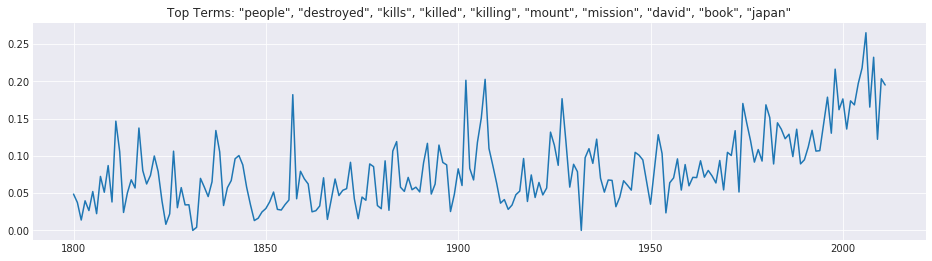

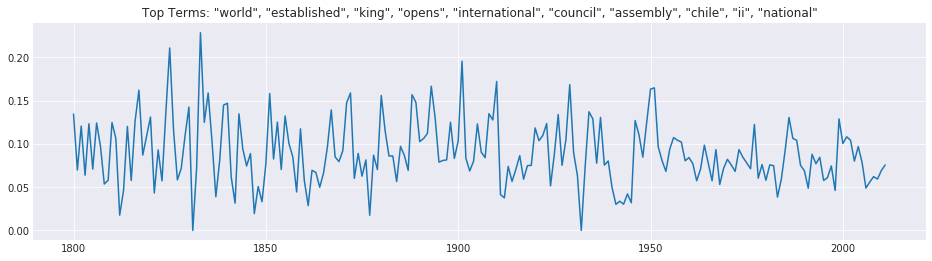

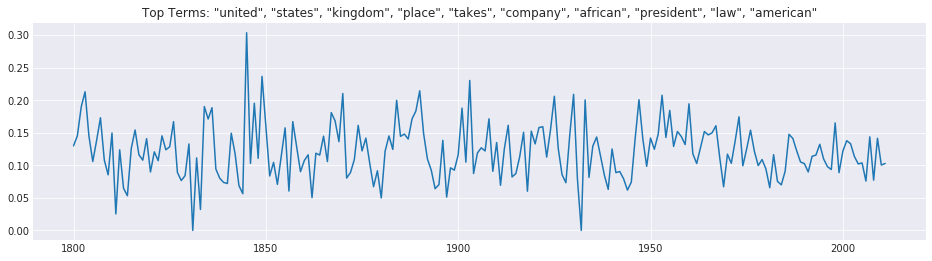

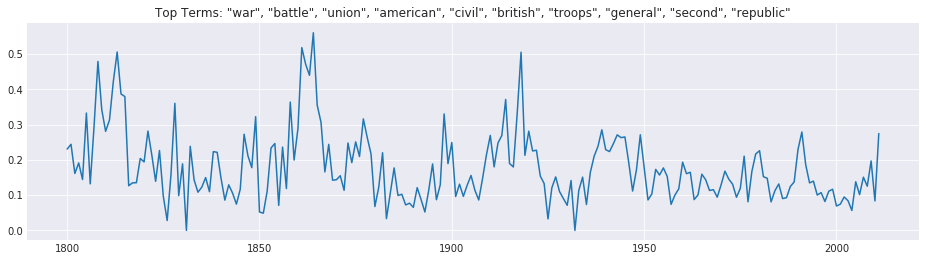

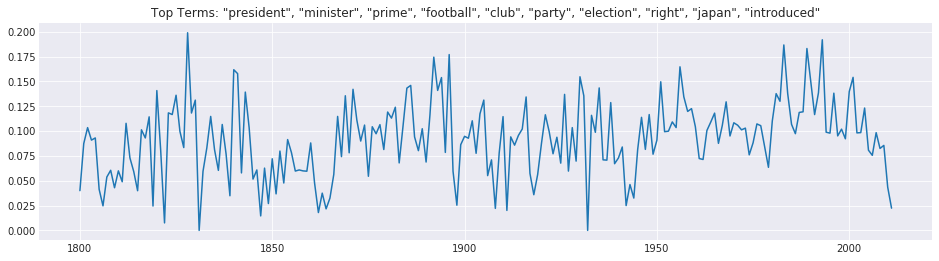

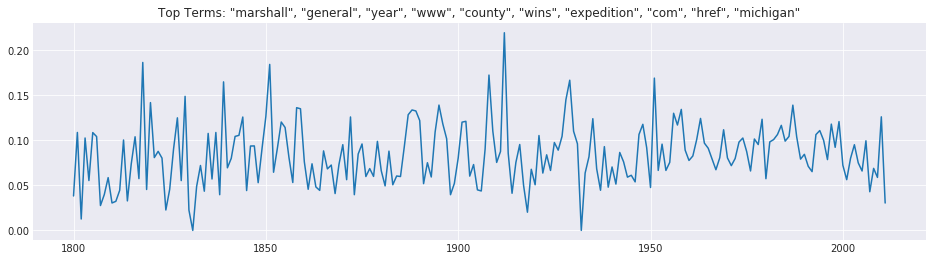

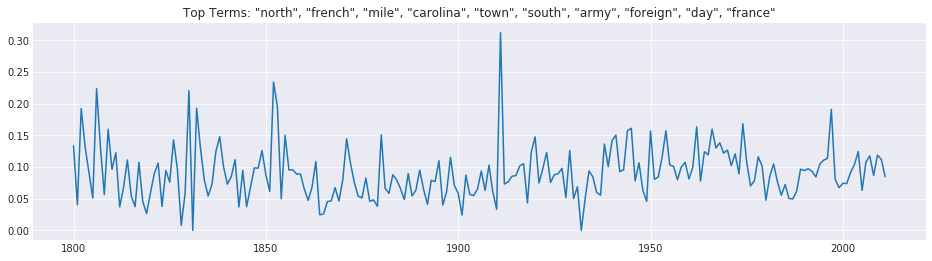

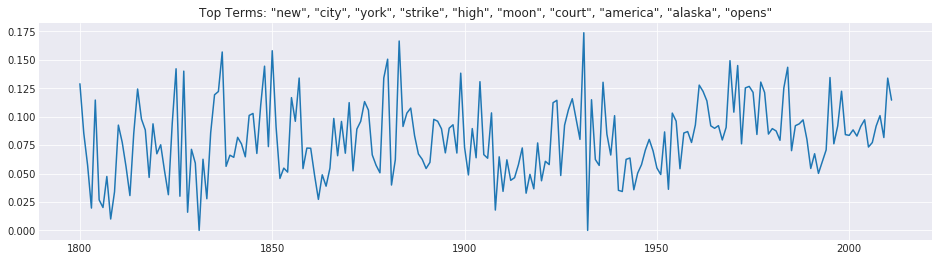

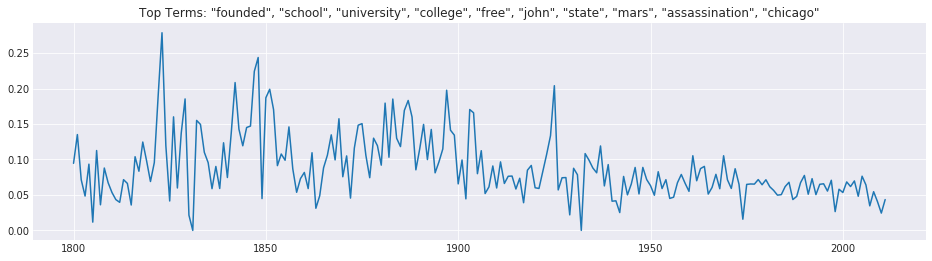

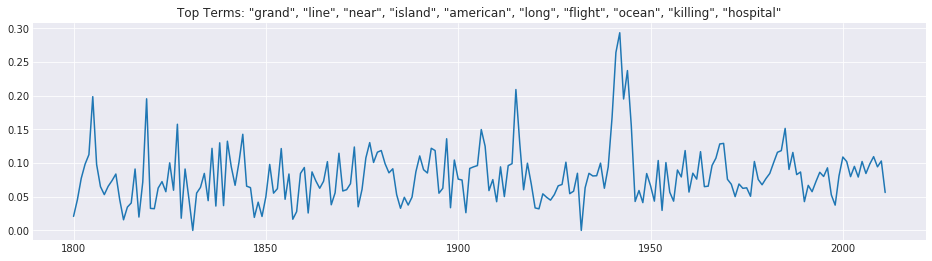

In [47]:
for top in range(num_topics):
    terms = [id2word[id] for id, _ in lda.get_topic_terms(top)]
    x = list(topics_by_year.keys())
    y = [tops[top] for tops in topics_by_year.values()]
#     spl = UnivariateSpline(x, y)
#     spl.set_smoothing_factor(0.3)
    plt.figure(figsize=(16,4))
    plt.title('Top Terms: "{}"'.format('", "'.join(terms)))
#     plt.plot(x, spl(x));
    plt.plot(x, y);